# Hand Written Classification using *Neural Network*

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train[0].shape

(28, 28)

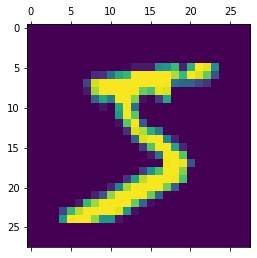

In [5]:
plt.matshow(X_train[0])

In [6]:
y_train[0]

5

In [7]:
#Scaling the data as the data is between 0-255
X_train = X_train / 255
X_test = X_test / 255

In [8]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [9]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7224 - accuracy: 0.8109
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3072 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2945 - accuracy: 0.9170
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2777 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2628 - accuracy: 0.9263


In [10]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2655 - accuracy: 0.9251


[0.26552650332450867, 0.9251000285148621]

In [11]:
y_predicted = model.predict(X_test_flattened)

In [12]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [13]:
confusionM = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
confusionM

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    2,    2,    0,    6,    7,    4,    2,    1],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   3,    9,  929,   16,    7,    4,   11,   11,   37,    5],
       [   1,    0,   21,  932,    0,   14,    2,   11,   19,   10],
       [   1,    1,    3,    1,  909,    0,   11,    4,   10,   42],
       [   8,    3,    4,   48,   11,  762,   14,    6,   29,    7],
       [   9,    3,    8,    1,    8,   11,  913,    2,    3,    0],
       [   1,    7,   22,    8,    8,    0,    0,  940,    2,   40],
       [   4,    8,    7,   27,    9,   25,    9,   11,  863,   11],
       [  10,    7,    1,   11,   20,    6,    0,   15,    6,  933]],
      dtype=int32)>

Text(69.0, 0.5, 'Actual')

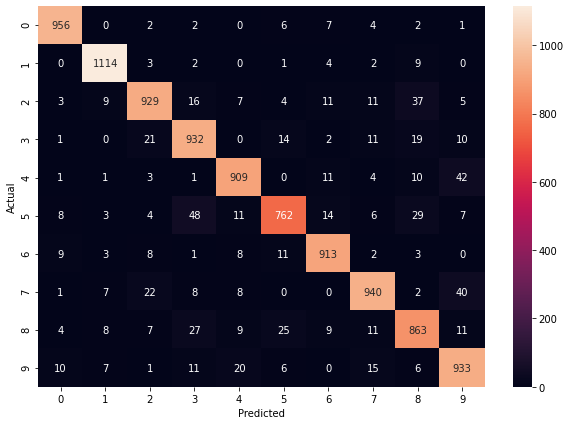

In [15]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confusionM, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Using the hidden layer and concept of flatten

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4456 - accuracy: 0.8725
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1293 - accuracy: 0.9616
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0897 - accuracy: 0.9729
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0672 - accuracy: 0.9795
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0508 - accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0403 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0319 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0243 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0206 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.015

In [17]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0878 - accuracy: 0.9762


[0.08777403086423874, 0.9761999845504761]